### Introduction to Time-Series Analysis

**Definition:**  
Time-Series Analysis involves analyzing data points collected or recorded at specific time intervals.

**Purpose:**  
Identify trends, seasonality, and patterns over time to make forecasts and informed decisions.

**Applications:**  
- Stock price forecasting
- Economic indicators analysis
- Risk management

---

### Key Components of Time-Series Data

- **Trend:**  
  The long-term movement or direction in the data.

- **Seasonality:**  
  Regular patterns or cycles in the data that occur at specific intervals (e.g., monthly, quarterly).

- **Cyclicality:**  
  Irregular fluctuations due to economic or business cycles.

- **Noise:**  
  Random variations that cannot be attributed to trend, seasonality, or cycles.

---

### Decomposition of Time-Series Data

#### Additive Model:

$$
y(t) = T(t) + S(t) + C(t) + e(t)
$$

#### Multiplicative Model:

$$
y(t) = T(t) \times S(t) \times C(t) \times e(t)
$$

#### Decomposition Methods:

Use statistical techniques to separate components.

---

### Practical Example: Decompose a Time-Series Dataset

**Scenario:**  
Decompose a time-series dataset of monthly stock prices.

**Steps:**  
1. Load the dataset using Pandas.  
2. Decompose the time-series data using the `statsmodels` library.  
3. Visualize the decomposed components.


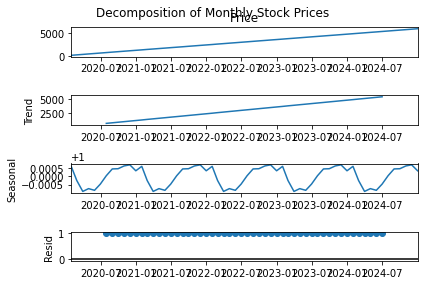

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
data = pd.read_csv('monthly_stock_prices_time_series_example.csv', index_col='Date', parse_dates=True)
stock_prices = data['Price']

# Decompose time-series data
decomposition = seasonal_decompose(stock_prices, model='multiplicative')

# Plot decomposed components
decomposition.plot()
plt.suptitle('Decomposition of Monthly Stock Prices')
plt.show()


---

### Moving Averages

**Definition:**  
A technique to smooth out short-term fluctuations and highlight longer-term trends.

**Types:**  
- **Simple Moving Average (SMA)**
- **Exponential Moving Average (EMA)**

**Formulas:**

- **SMA:**

$$
SMA_n = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}
$$

- **EMA:**

$$
EMA_t = \alpha P_t + (1 - \alpha) EMA_{t-1}
$$

**Applications:**  
- Trend identification
- Smoothing data
- Forecasting

---

### Practical Example: Calculate and Plot SMA and EMA

**Scenario:**  
Calculate and plot SMA and EMA for stock prices.

**Steps:**  
1. Load the dataset using Pandas.  
2. Calculate SMA and EMA.  
3. Plot the stock prices along with SMA and EMA.


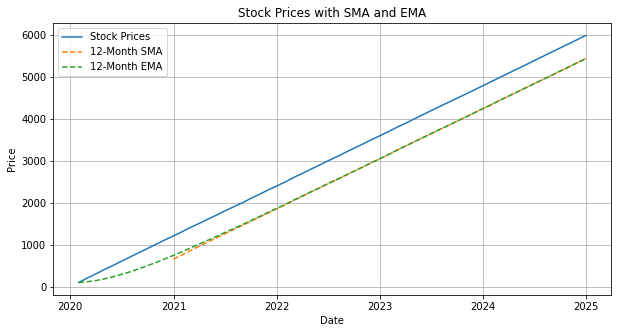

In [6]:
# Load dataset
data = pd.read_csv('monthly_stock_prices_time_series_example.csv', index_col='Date', parse_dates=True)
stock_prices = data['Price']

# Calculate moving averages
sma = stock_prices.rolling(window=12).mean()
ema = stock_prices.ewm(span=12, adjust=False).mean()

# Plot stock prices with SMA and EMA
plt.figure(figsize=(10, 5))
plt.plot(stock_prices, label='Stock Prices')
plt.plot(sma, label='12-Month SMA', linestyle='--')
plt.plot(ema, label='12-Month EMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices with SMA and EMA')
plt.legend()
plt.grid(True)
plt.show()


---

### Autoregressive Integrated Moving Average (ARIMA) Model

**Definition:**  
A comprehensive model for time-series forecasting that combines autoregression, differencing, and moving averages.

**Components:**

- **AR (p):**  
  Autoregression - relationship between an observation and a number of lagged observations.

- **I (d):**  
  Integration - differencing of observations to make the time series stationary.

- **MA (q):**  
  Moving Average - relationship between an observation and a residual error from a moving average model.

**Formula:**

$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \dots + \theta_q e_{t-q} + e_t
$$

---

### Practical Example: Forecast Future Stock Prices using ARIMA

**Scenario:**  
Forecast future stock prices using the ARIMA model.

**Steps:**  
1. Load the dataset using Pandas.  
2. Fit the ARIMA model using the `statsmodels` library.  
3. Forecast future stock prices and visualize the results.


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
data = pd.read_csv('monthly_stock_prices_time_series_example.csv', index_col='Date', parse_dates=True)
stock_prices = data['Price']

# Fit ARIMA model
model = ARIMA(stock_prices, order=(5, 1, 0))  # ARIMA(p, d, q)
model_fit = model.fit(disp=0)

# Forecast future prices
forecast, stderr, conf_int = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.plot(pd.date_range(start=stock_prices.index[-1], periods=13, freq='M')[1:], forecast, label='Forecasted Stock Prices')
plt.fill_between(pd.date_range(start=stock_prices.index[-1], periods=13, freq='M')[1:], conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast using ARIMA')
plt.legend()
plt.grid(True)
plt.show()


c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


TypeError: ARIMA.fit() got an unexpected keyword argument 'disp'

---

### Evaluating Forecast Accuracy

**Metrics:**  
Common metrics for evaluating forecast accuracy include Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

**Formulas:**

- **MAE:**

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- **MSE:**

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **RMSE:**

$$
RMSE = \sqrt{MSE}
$$

**Purpose:**  
Assess the accuracy of forecasts and improve model performance.

---

### Practical Example: Evaluate Forecast Accuracy using MAE, MSE, and RMSE

**Scenario:**  
Evaluate the accuracy of stock price forecasts using MAE, MSE, and RMSE.

**Steps:**  
1. Load the dataset and generate forecasts.  
2. Calculate MAE, MSE, and RMSE.  
3. Interpret the results.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('monthly_stock_prices_time_series_example.csv', index_col='Date', parse_dates=True)
stock_prices = data['Price']

# Fit ARIMA model and generate forecasts
model = ARIMA(stock_prices, order=(5, 1, 0))
model_fit = model.fit(disp=0)
forecast, stderr, conf_int = model_fit.forecast(steps=12)

# Actual values for comparison (example purposes)
actual = stock_prices[-12:]

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual, forecast[:len(actual)])
mse = mean_squared_error(actual, forecast[:len(actual)])
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


NameError: name 'ARIMA' is not defined